In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c/titanic/train.csv
/kaggle/input/c/titanic/test.csv
/kaggle/input/c/titanic/gender_submission.csv
/kaggle/input/titanic/train_and_test2.csv


In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv(r"/kaggle/input/c/titanic/train.csv")

In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df["PassengerId"].duplicated().value_counts()

PassengerId
False    891
Name: count, dtype: int64

In [125]:
df.set_index("PassengerId",inplace= True)
display(df)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [127]:
df.Age = df.Age.fillna(df.Age.mean())
df.Age.isna().value_counts()

Age
False    891
Name: count, dtype: int64

In [128]:
print((df['Cabin'].isna().value_counts()/891)*100)

Cabin
True     77.104377
False    22.895623
Name: count, dtype: float64


In [129]:
df.drop('Cabin',axis=1,inplace=True)

In [130]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


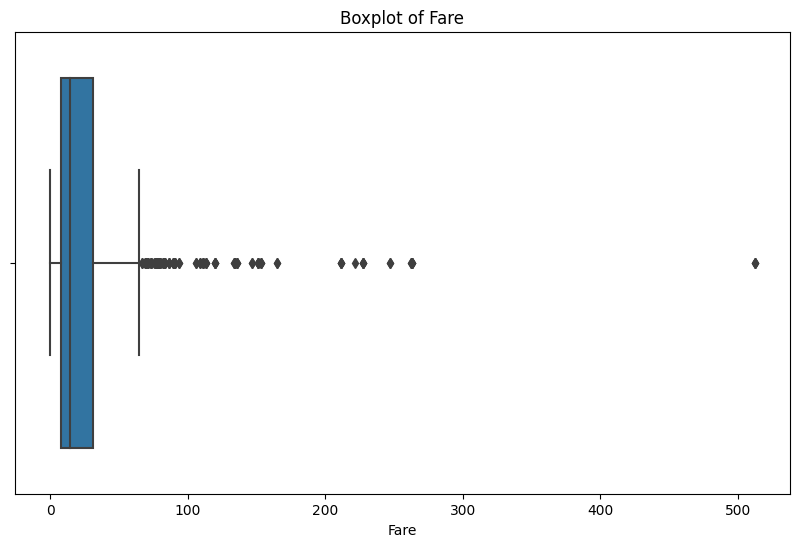

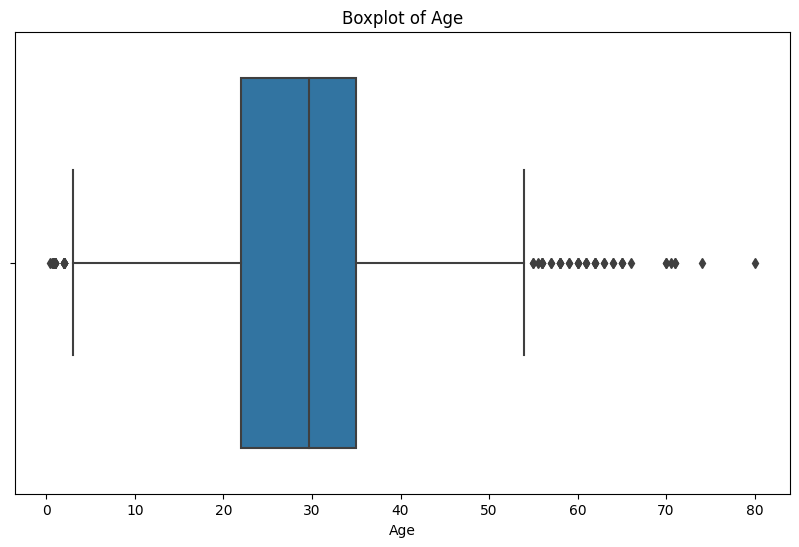

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

In [132]:
#'Fare'
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

#'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

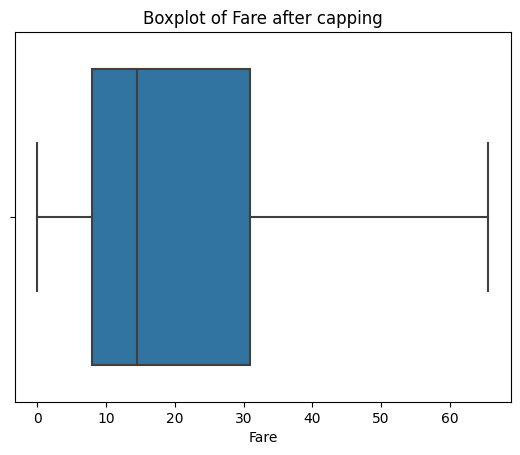

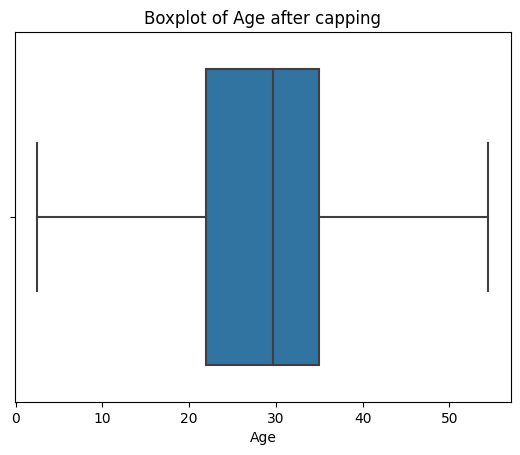

In [133]:
df['Fare'] = df['Fare'].apply(lambda x: upper_bound_fare if x > upper_bound_fare else (lower_bound_fare if x < lower_bound_fare else x))
df['Age'] = df['Age'].apply(lambda x: upper_bound_age if x > upper_bound_age else (lower_bound_age if x < lower_bound_age else x))

sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare after capping')
plt.show()

sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age after capping')
plt.show()

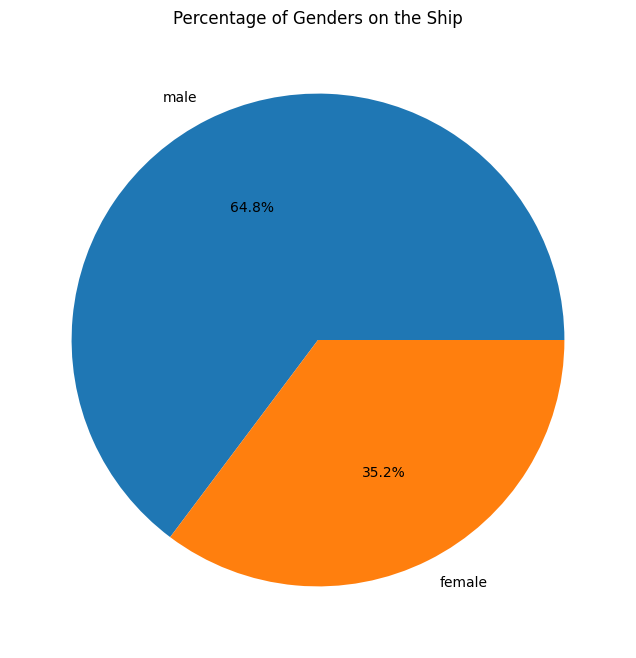

In [134]:
sex_count = df.Sex.value_counts()

plt.figure(figsize=(8,8))
plt.pie(sex_count,labels=sex_count.index,autopct='%.1f%%')
plt.title("Percentage of Genders on the Ship")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


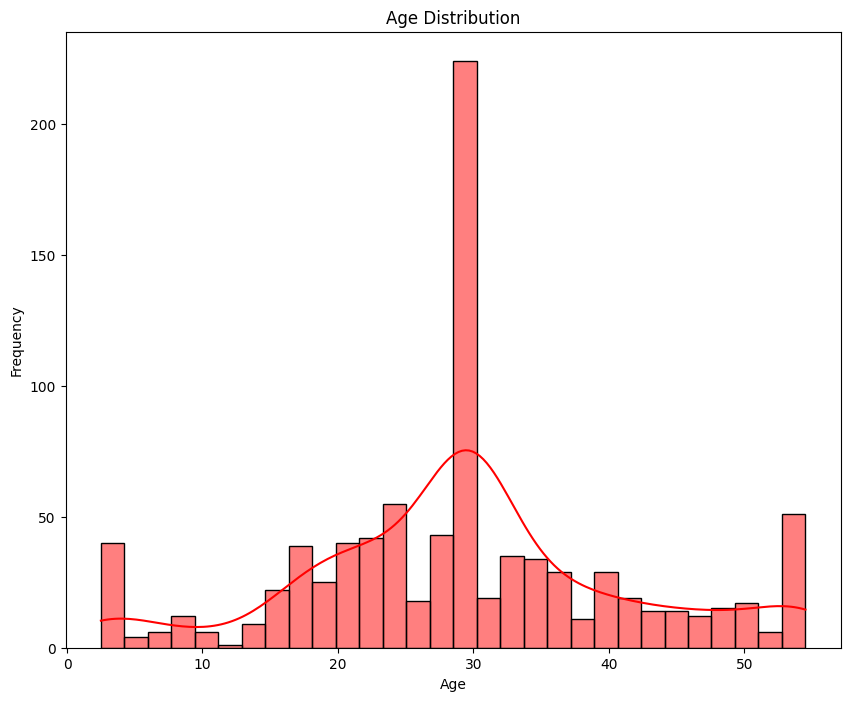

In [135]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'],bins=30,kde=True,color="red")
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

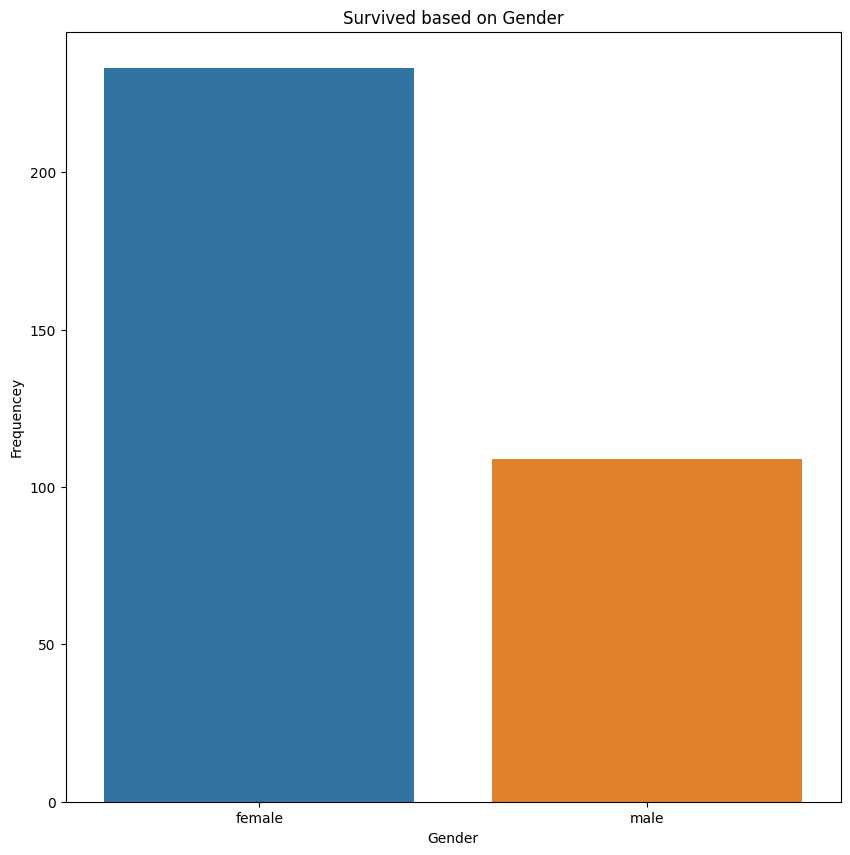

In [136]:
survived = df.loc[df.Survived == 1]
gender_survived = survived.Sex

plt.figure(figsize=(10,10))
sns.countplot(x=gender_survived, data=survived, order= gender_survived.value_counts().index)
plt.title("Survived based on Gender")
plt.xlabel("Gender")
plt.ylabel("Frequencey")
plt.show()

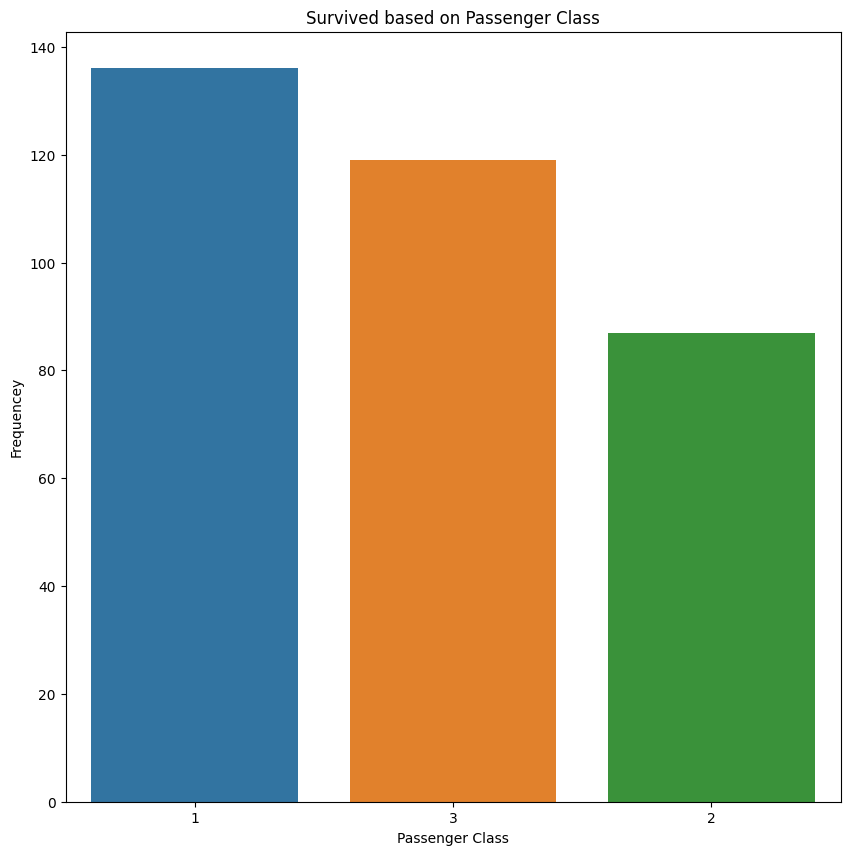

In [137]:
survived = df.loc[df.Survived == 1]
Passenger_class_survived = survived.Pclass

plt.figure(figsize=(10,10))
sns.countplot(x=Passenger_class_survived, data=survived, order= Passenger_class_survived.value_counts().index)
plt.title("Survived based on Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Frequencey")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


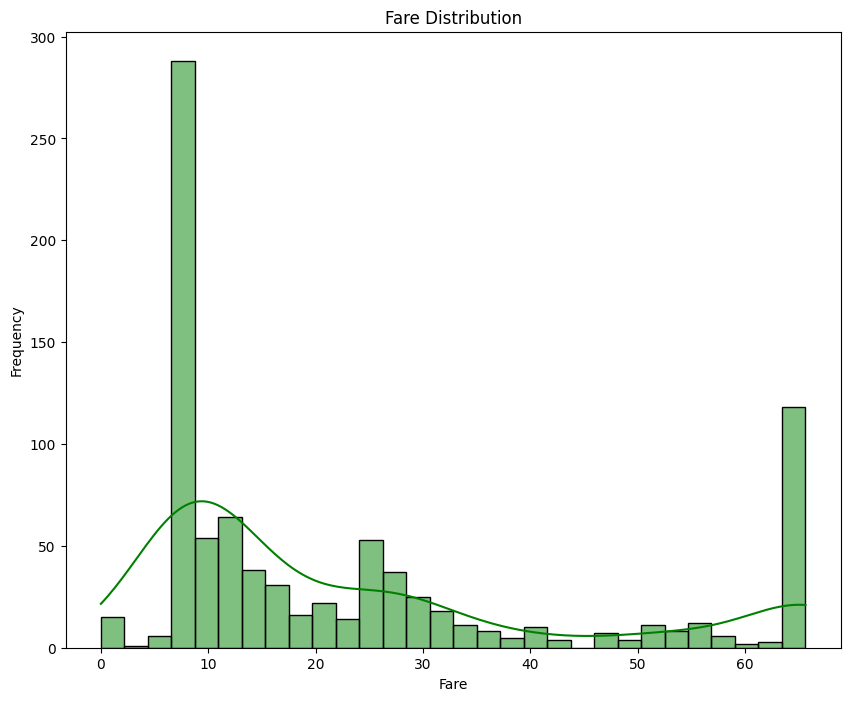

In [138]:
plt.figure(figsize=(10,8))
sns.histplot(df['Fare'],bins=30,kde=True,color="green")
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

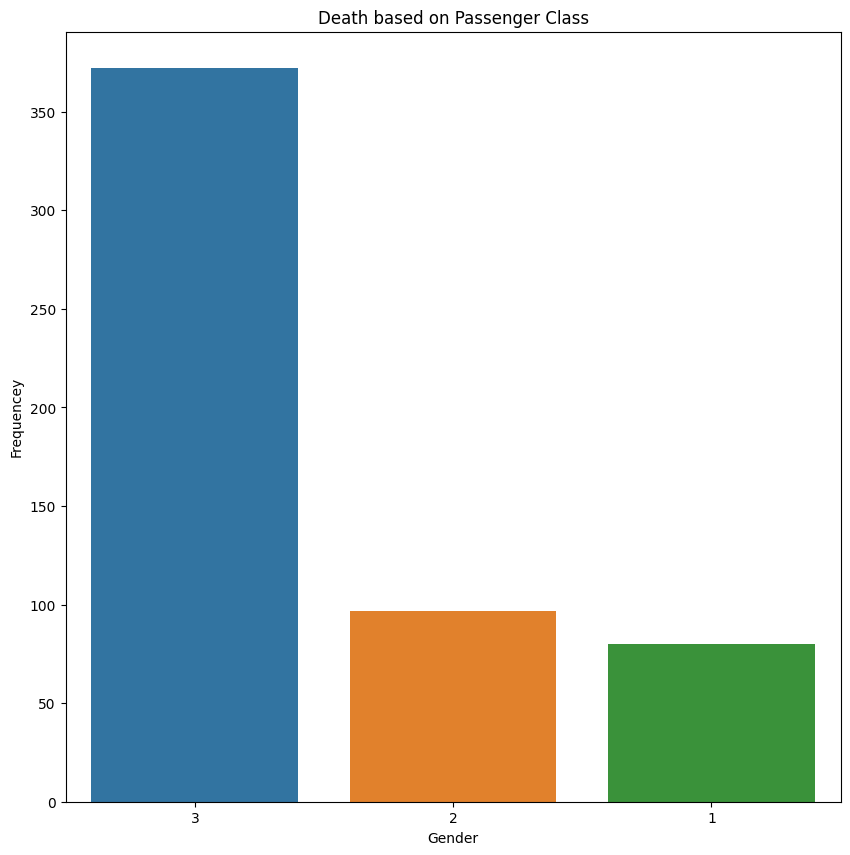

In [139]:
dead = df.loc[df.Survived == 0]
Passenger_class_dead = dead.Pclass

plt.figure(figsize=(10,10))
sns.countplot(x=Passenger_class_dead, data=dead, order= Passenger_class_dead.value_counts().index)
plt.title("Death based on Passenger Class")
plt.xlabel("Gender")
plt.ylabel("Frequencey")
plt.show()

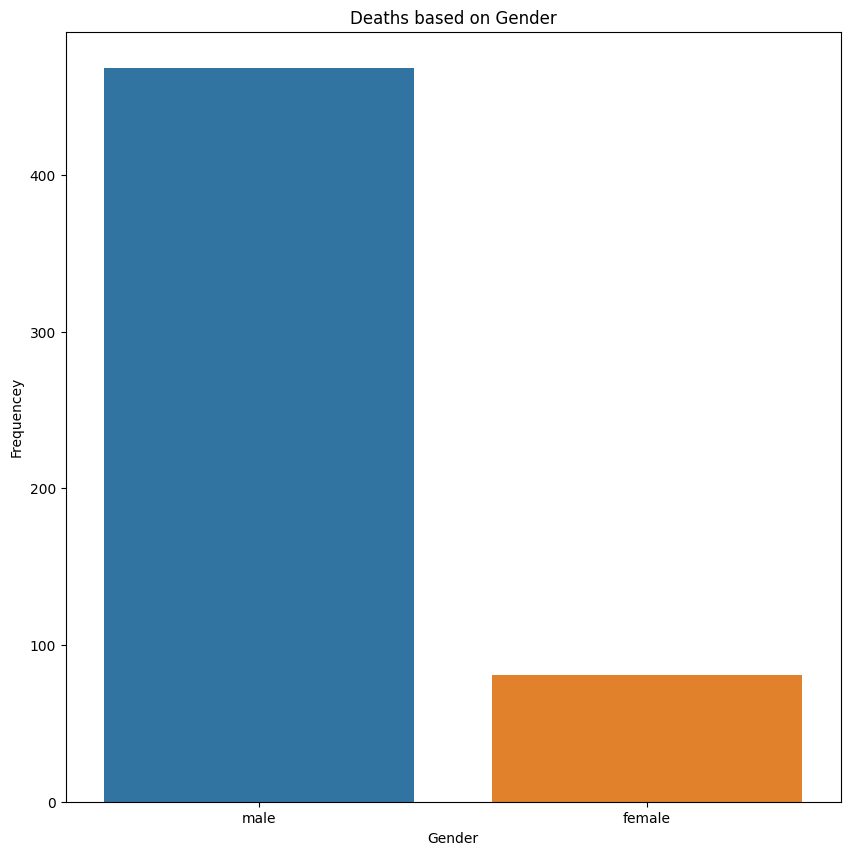

In [140]:
dead = df.loc[df.Survived == 0]
gender_dead = dead.Sex

plt.figure(figsize=(10,10))
sns.countplot(x=gender_dead, data=dead, order= gender_dead.value_counts().index)
plt.title("Deaths based on Gender")
plt.xlabel("Gender")
plt.ylabel("Frequencey")
plt.show()

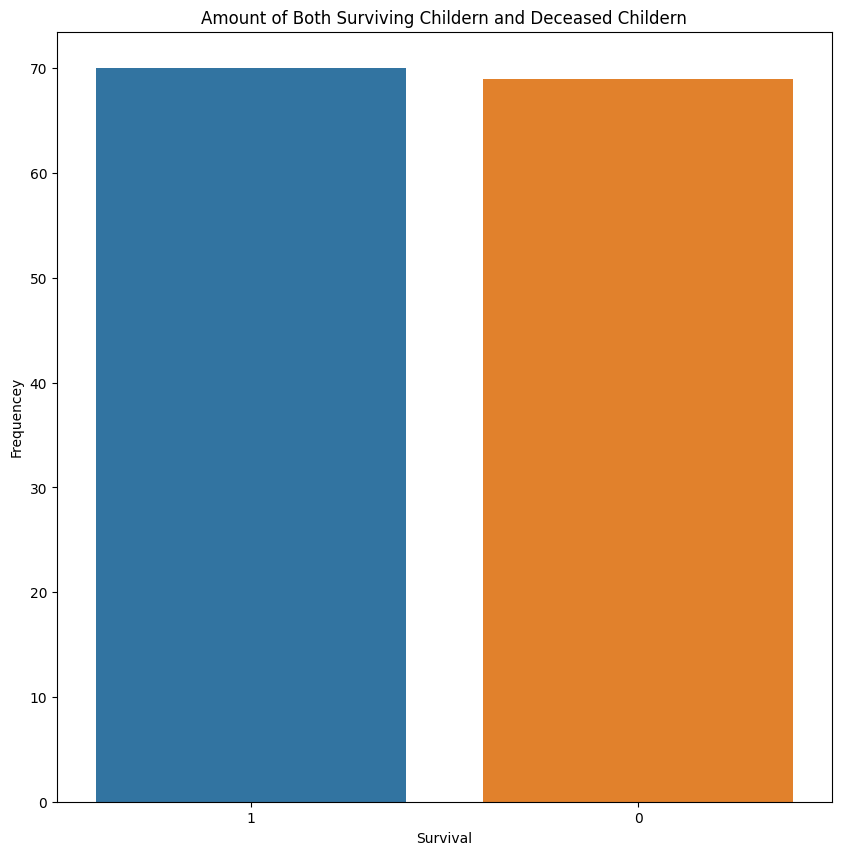

In [141]:
childern = df.loc[df.Age <= 18]

plt.figure(figsize=(10,10))
sns.countplot(x=childern.Survived, data=childern, order= childern.Survived.value_counts().index)
plt.title("Amount of Both Surviving Childern and Deceased Childern")
plt.xlabel("Survival")
plt.ylabel("Frequencey")
plt.show()

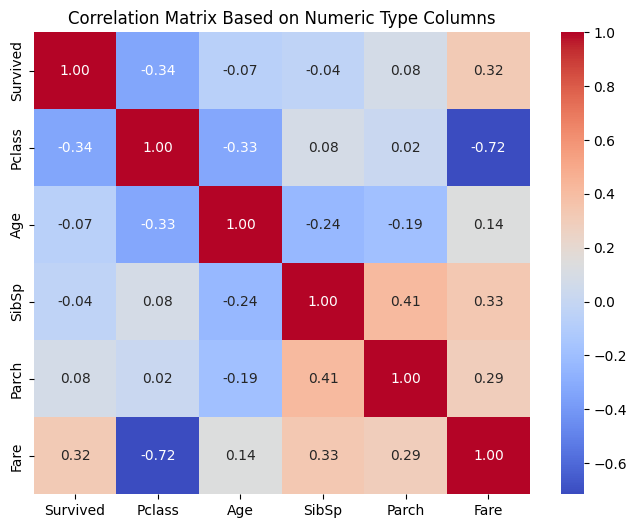

In [142]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Based on Numeric Type Columns')
plt.show()

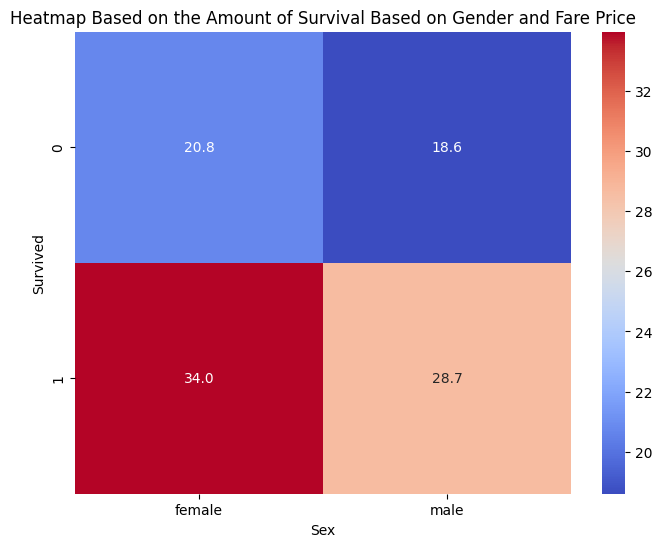

In [143]:
heatmap_data = df.pivot_table(index='Survived', columns='Sex', values='Fare', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
plt.title("Heatmap Based on the Amount of Survival Based on Gender and Fare Price")
plt.show()